In [1]:
# Load libraries
################################################################################
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import IPython
from IPython.display import HTML
from matplotlib import animation

from scipy import signal as spysig

import simpleDASreader
import kptruong

In [2]:
# Path
################################################################################
paths, _, _ = simpleDASreader.find_DAS_files(
    experiment_path='../DAS_Campus_Test/Campus_test_20230628_2kHz',
    start = '20230628 113128',
    duration=100
    )

print(f'{len(paths)} files')
print(f'{paths[0].split("/")[-1]}')
print(f'{paths[-1].split("/")[-1]}')

-- Header info file: 113119.hdf5 --
	Experiment:            Campus_test_20230628
	File timestamp:        2023-06-28 11:31:19
	Type of data:          Phase rate per distance, unit: rad/(s*m)
	Sampling frequency:    2000.00 Hz
	Data shape:            20000 samples x 600 channels
	Gauge length:          2.0 m
	Sensitivities:         9.36e+06 rad/(strain*m)
	Regions of interest:   0:599:1
-----------------------------------
11 files
113119.hdf5
113259.hdf5


In [3]:
# Load data
################################################################################
signal = simpleDASreader.load_DAS_files(filepaths=paths,).iloc[::-1]
print(signal.shape)

Loaded files ['113119.hdf5', '113129.hdf5', '113139.hdf5', '113149.hdf5', '113159.hdf5', '113209.hdf5', '113219.hdf5', '113229.hdf5', '113239.hdf5', '113249.hdf5', '113259.hdf5']  in 1.9 s
(220000, 600)


In [4]:
# Transform data
################################################################################
data = kptruong.transform_das(signal).iloc[100::, 50:550]
print(data.shape)
data.head()

(3338, 500)


,50,51,52,53,54,55,56,57,58,59,...,540,541,542,543,544,545,546,547,548,549
2023-06-28 11:33:05.978500,1.102132e-09,-5.694607e-10,-1.998716e-09,-3.790410e-09,-6.224631e-09,-9.055646e-09,-1.144545e-08,-1.228523e-08,-1.091410e-08,-7.541180e-09,...,1.620494e-09,-1.243438e-09,-1.874288e-09,-6.177866e-10,7.431891e-10,7.210008e-10,-7.540768e-10,-2.612750e-09,-3.782262e-09,-4.074099e-09
2023-06-28 11:33:05.946500,5.960522e-09,6.169875e-09,6.637179e-09,6.622154e-09,5.472329e-09,3.321406e-09,1.138285e-09,-4.593388e-11,4.666217e-12,6.999900e-10,...,1.445337e-09,-1.416029e-09,-1.949718e-09,-4.629250e-10,1.347258e-09,1.944404e-09,1.009847e-09,-6.596345e-10,-2.031112e-09,-2.701301e-09
2023-06-28 11:33:05.914500,3.079279e-09,3.400716e-09,3.971298e-09,4.114763e-09,3.286332e-09,1.695208e-09,3.168472e-10,1.254008e-10,1.284484e-09,3.121173e-09,...,7.677323e-09,5.886020e-09,5.294438e-09,5.546206e-09,5.142998e-09,3.142160e-09,1.572677e-11,-2.847365e-09,-4.199150e-09,-3.729267e-09
2023-06-28 11:33:05.882500,3.217697e-09,1.659832e-09,-4.008444e-10,-3.034203e-09,-6.045173e-09,-8.889532e-09,-1.068119e-08,-1.058450e-08,-8.427611e-09,-4.843858e-09,...,-5.020412e-10,1.909998e-09,5.459603e-09,8.616408e-09,9.328633e-09,6.803757e-09,2.104886e-09,-2.729085e-09,-5.968051e-09,-6.954193e-09
2023-06-28 11:33:05.850500,3.802116e-09,2.296553e-09,1.200767e-09,9.947645e-12,-1.705134e-09,-3.902704e-09,-5.948817e-09,-7.026145e-09,-6.812855e-09,-5.650840e-09,...,-2.078534e-09,2.017411e-10,2.295371e-09,3.124248e-09,1.660590e-09,-1.909455e-09,-6.020383e-09,-8.694319e-09,-8.641532e-09,-5.865831e-09


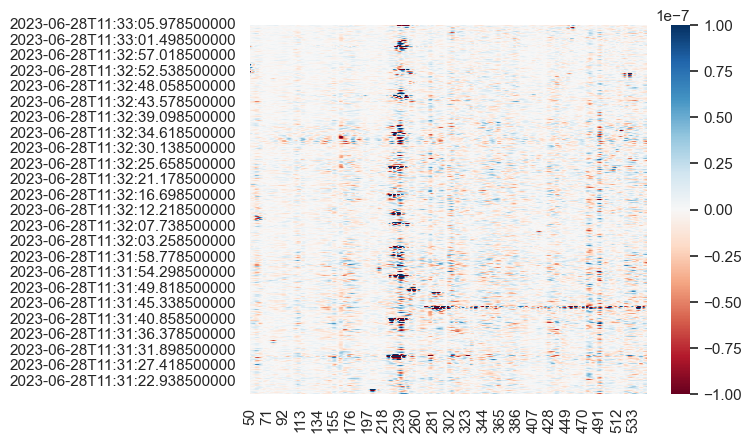

In [5]:
# Heatmap
################################################################################
vmin = -1e-7
vmax = 1e-7
sns.heatmap(data, cmap='RdBu', center=0, vmin=vmin, vmax=vmax);

In [6]:
data.shape

(3338, 500)

In [197]:
(data.shape[0]+100)/110

31.254545454545454

In [7]:
nchannel = 50
ntime = 3*32

In [91]:
# from scipy.signal import convolve2d

# kernel = np.ones((ntime, nchannel)) / (ntime * nchannel)
# out = convolve2d(np.abs(data), kernel, mode='same')

In [199]:
# from scipy.ndimage import median_filter
# out = median_filter(np.abs(data), size=(ntime, nchannel))

In [8]:
from scipy.ndimage import gaussian_filter
out = gaussian_filter(np.abs(data), sigma=10)

In [9]:
out_df = pd.DataFrame(out, index=data.index)
out_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
2023-06-28 11:33:05.978500,3.314906e-09,3.311749e-09,3.305526e-09,3.296415e-09,3.284682e-09,3.270678e-09,3.254838e-09,3.237673e-09,3.219749e-09,3.201670e-09,...,5.884308e-09,5.783377e-09,5.691713e-09,5.610148e-09,5.539328e-09,5.479747e-09,5.431765e-09,5.395616e-09,5.371442e-09,5.359334e-09
2023-06-28 11:33:05.946500,3.312509e-09,3.309370e-09,3.303181e-09,3.294118e-09,3.282441e-09,3.268496e-09,3.252712e-09,3.235591e-09,3.217695e-09,3.199620e-09,...,5.888308e-09,5.787675e-09,5.696277e-09,5.614947e-09,5.544332e-09,5.484924e-09,5.437082e-09,5.401038e-09,5.376935e-09,5.364863e-09
2023-06-28 11:33:05.914500,3.307810e-09,3.304707e-09,3.298585e-09,3.289615e-09,3.278047e-09,3.264217e-09,3.248539e-09,3.231505e-09,3.213660e-09,3.195589e-09,...,5.896254e-09,5.796208e-09,5.705334e-09,5.624467e-09,5.554254e-09,5.495184e-09,5.447615e-09,5.411779e-09,5.387815e-09,5.375812e-09
2023-06-28 11:33:05.882500,3.300931e-09,3.297879e-09,3.291857e-09,3.283023e-09,3.271616e-09,3.257954e-09,3.242434e-09,3.225527e-09,3.207757e-09,3.189693e-09,...,5.907696e-09,5.808508e-09,5.718402e-09,5.638213e-09,5.568586e-09,5.510010e-09,5.462840e-09,5.427306e-09,5.403544e-09,5.391643e-09
2023-06-28 11:33:05.850500,3.292215e-09,3.289231e-09,3.283336e-09,3.274678e-09,3.263478e-09,3.250033e-09,3.234715e-09,3.217968e-09,3.200291e-09,3.182227e-09,...,5.922201e-09,5.824138e-09,5.735035e-09,5.655729e-09,5.586867e-09,5.528936e-09,5.482286e-09,5.447145e-09,5.423646e-09,5.411878e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 11:31:19.322500,5.043204e-09,5.041498e-09,5.037878e-09,5.031948e-09,5.023146e-09,5.010803e-09,4.994223e-09,4.972751e-09,4.945822e-09,4.913029e-09,...,1.311322e-08,1.311281e-08,1.310853e-08,1.310190e-08,1.309421e-08,1.308646e-08,1.307945e-08,1.307374e-08,1.306971e-08,1.306762e-08
2023-06-28 11:31:19.290500,5.026543e-09,5.024958e-09,5.021576e-09,5.015999e-09,5.007655e-09,4.995868e-09,4.979930e-09,4.959174e-09,4.933024e-09,4.901056e-09,...,1.322343e-08,1.322509e-08,1.322277e-08,1.321796e-08,1.321190e-08,1.320559e-08,1.319976e-08,1.319496e-08,1.319156e-08,1.318978e-08
2023-06-28 11:31:19.258500,5.013856e-09,5.012362e-09,5.009163e-09,5.003854e-09,4.995859e-09,4.984495e-09,4.969046e-09,4.948837e-09,4.923280e-09,4.891943e-09,...,1.330759e-08,1.331083e-08,1.331000e-08,1.330658e-08,1.330177e-08,1.329655e-08,1.329163e-08,1.328754e-08,1.328460e-08,1.328307e-08
2023-06-28 11:31:19.226500,5.005322e-09,5.003890e-09,5.000813e-09,4.995685e-09,4.987925e-09,4.976847e-09,4.961728e-09,4.941886e-09,4.916730e-09,4.885819e-09,...,1.336423e-08,1.336854e-08,1.336873e-08,1.336625e-08,1.336230e-08,1.335781e-08,1.335351e-08,1.334989e-08,1.334729e-08,1.334592e-08


In [150]:
threshold = 4e-8
# threshold = np.partition(out.flatten(), -2)[-200]
print(threshold)
print((out.flatten()<threshold).mean())

4e-08
0.9940850808867585


In [151]:
events = np.argwhere(out >= threshold)
print(events.shape)
print(events[0: 5])

(9872, 2)
[[  0 186]
 [  0 187]
 [  0 188]
 [  0 189]
 [  0 190]]


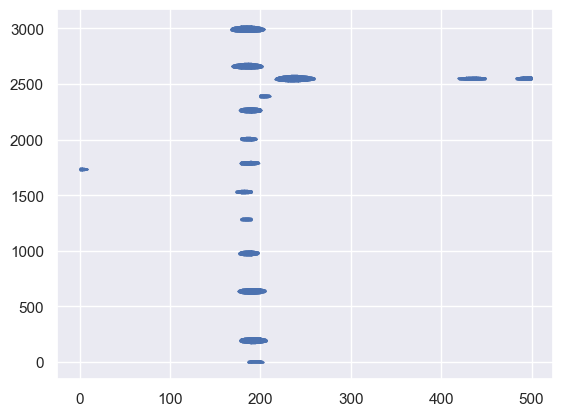

In [148]:
plt.scatter(events[:, 1], events[:, 0], s=0.1);

In [134]:
from sklearn.cluster import DBSCAN

In [137]:
clustering = DBSCAN(eps=3, min_samples=2).fit(events)
clustering.labels_

array([ 0,  0,  0, ..., 15, 15, 15])

In [139]:
pd.Series(clustering.labels_).value_counts().sort_index()

0      186
1     1038
2      991
3      592
4      176
5      300
6       95
7      414
8      335
9      714
10     168
11    1574
12     326
13     454
14    1097
15    1412
dtype: int64

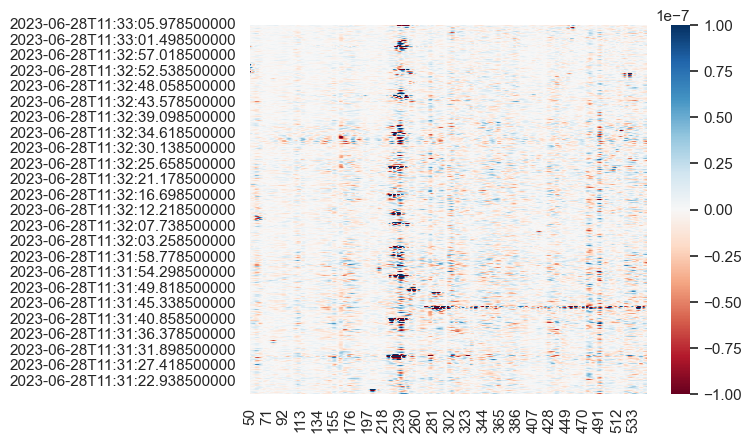

In [99]:
# Heatmap
################################################################################
vmin = -1e-7
vmax = 1e-7
sns.heatmap(data, cmap='RdBu', center=0, vmin=vmin, vmax=vmax);

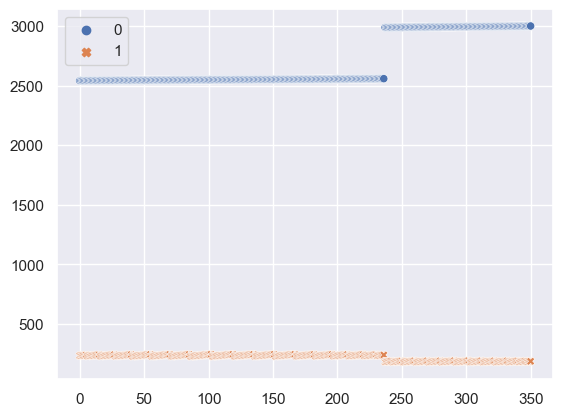

In [85]:
sns.scatterplot(data=events);

In [77]:
pd.Series(events[:, 0]).value_counts()

2548    17
2549    17
2550    16
2551    16
2552    16
2553    15
2545    15
2546    15
2547    15
2554    14
2544    13
2555    12
2556    12
2543    12
2993    11
2994    11
2997    10
2542    10
2557    10
2990    10
2991    10
2992    10
2995    10
2996    10
2998     8
2989     8
2999     6
2541     6
2988     6
2558     6
3000     4
dtype: int64

In [157]:
max_idx = np.unravel_index(out.argmax(), out.shape)
max_idx

(181, 235)

In [158]:
data_cut = data.iloc[
    int(max_idx[0] - ntime/2): int(max_idx[0] + ntime/2),
    int(max_idx[1] - nchannel/2): int(max_idx[1] + nchannel/2),
]

In [20]:
# Heatmap
################################################################################
vmin = -1e-7
vmax = 1e-7
sns.heatmap(data_cut, cmap='RdBu', center=0, vmin=vmin, vmax=vmax);

NameError: name 'data_cut' is not defined

In [ ]:
# Heatmap
################################################################################
vmin = -5e-8
vmax = 5e-8
sns.heatmap(data_cut, cmap='RdBu', center=0, vmin=vmin, vmax=vmax);

In [19]:
# Heatmap
################################################################################
vmin = -5e-8
vmax = 5e-8
sns.heatmap(data_cut, cmap='RdBu', center=0, vmin=vmin, vmax=vmax);

NameError: name 'data_cut' is not defined

In [18]:
# Heatmap
################################################################################
vmin = -1e-7
vmax = 1e-7
sns.heatmap(data_cut, cmap='RdBu', center=0, vmin=vmin, vmax=vmax);

NameError: name 'data_cut' is not defined

In [89]:
data_cut.describe()

,222,223,224,225,226,227,228,229,230,231,...,242,243,244,245,246,247,248,249,250,251
count,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,...,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01
mean,1.438834e-10,-2.809213e-12,-1.628517e-10,-2.355410e-10,-9.578971e-11,3.321070e-10,9.693319e-10,1.551340e-09,1.781155e-09,1.594850e-09,...,-7.683574e-10,-9.389407e-10,-8.946324e-10,-7.038405e-10,-4.497945e-10,-2.156305e-10,-6.237146e-11,-4.389863e-12,-1.287131e-11,-4.446894e-11
std,2.083147e-08,3.886576e-08,5.608194e-08,6.156161e-08,4.586916e-08,2.278160e-08,7.307468e-08,1.328051e-07,1.643398e-07,1.609176e-07,...,6.546642e-08,6.964968e-08,6.448861e-08,5.049909e-08,3.340227e-08,2.184130e-08,2.077286e-08,2.265229e-08,2.244828e-08,2.083057e-08
min,-7.057758e-08,-1.303455e-07,-1.827839e-07,-1.955321e-07,-1.378898e-07,-6.117255e-08,-3.611489e-07,-6.225757e-07,-7.041204e-07,-5.762208e-07,...,-1.805038e-07,-2.391205e-07,-2.402457e-07,-2.001437e-07,-1.409178e-07,-8.364484e-08,-7.188351e-08,-8.169337e-08,-7.333348e-08,-6.582167e-08
25%,-1.096926e-08,-1.430207e-08,-1.794298e-08,-2.128462e-08,-1.870404e-08,-1.309512e-08,-1.697675e-08,-2.440560e-08,-3.496886e-08,-3.683727e-08,...,-3.734277e-08,-3.294021e-08,-2.174605e-08,-1.637887e-08,-1.521439e-08,-1.155420e-08,-9.400327e-09,-8.478161e-09,-1.019567e-08,-1.012387e-08
50%,3.184320e-10,-5.019882e-11,1.547650e-09,4.233313e-10,2.718789e-10,2.963683e-09,4.898673e-09,3.934087e-09,1.487370e-09,8.608576e-10,...,-1.318695e-09,2.383386e-09,-3.296382e-09,-1.971696e-09,-1.884536e-10,4.515085e-10,-5.505990e-10,-6.273053e-10,1.561077e-10,-1.172077e-09
75%,1.122088e-08,1.321546e-08,1.781955e-08,1.830355e-08,1.539906e-08,1.246348e-08,2.159980e-08,3.706381e-08,4.966058e-08,4.756320e-08,...,3.434337e-08,3.145418e-08,2.418129e-08,1.376462e-08,1.084316e-08,1.281569e-08,9.301904e-09,6.925230e-09,6.528523e-09,8.856111e-09
max,5.932460e-08,1.348297e-07,2.028266e-07,2.261846e-07,1.484215e-07,7.430019e-08,2.320552e-07,4.043575e-07,4.981160e-07,4.941446e-07,...,2.914958e-07,3.318755e-07,2.885367e-07,1.902264e-07,1.577813e-07,1.023327e-07,6.367133e-08,8.039216e-08,7.528507e-08,6.560738e-08


In [42]:
np.abs(data_cut).describe().median(axis=1)

count    9.600000e+01
mean     1.687107e-08
std      1.645055e-08
min      2.367813e-10
25%      6.162145e-09
50%      1.300325e-08
75%      2.433085e-08
max      7.848922e-08
dtype: float64